## Завдання 4: Python та Jupyter Notebook
Напишіть скрипт на Python, який читає CSV-файл з даними про продажі продуктів і виконує наступне:
- Обчислює загальну суму продажів для кожного продукту.
- Створює бар-чарт для візуалізації цих даних.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('product_sales_test.csv')

In [3]:
df

,Product Name,Units Sold,Unit Price,Sale Date
0,Headphones,91,76.16,2023-03-19
1,Keyboard,93,56.84,2023-08-08
2,Speaker,19,92.88,2023-02-12
3,Laptop,38,1698.73,2023-07-19
4,Speaker,16,92.88,2023-10-19
...,...,...,...,...
995,Monitor,73,335.99,2023-09-27
996,Keyboard,83,56.84,2023-11-04
997,Smartphone,64,754.85,2023-06-23
998,Tablet,34,525.58,2023-02-19


In [4]:
df['Sum sales'] = df['Units Sold'] * df['Unit Price']

In [5]:
df

,Product Name,Units Sold,Unit Price,Sale Date,Sum sales
0,Headphones,91,76.16,2023-03-19,6930.56
1,Keyboard,93,56.84,2023-08-08,5286.12
2,Speaker,19,92.88,2023-02-12,1764.72
3,Laptop,38,1698.73,2023-07-19,64551.74
4,Speaker,16,92.88,2023-10-19,1486.08
...,...,...,...,...,...
995,Monitor,73,335.99,2023-09-27,24527.27
996,Keyboard,83,56.84,2023-11-04,4717.72
997,Smartphone,64,754.85,2023-06-23,48310.40
998,Tablet,34,525.58,2023-02-19,17869.72


In [6]:
sales_by_product = df.groupby('Product Name')['Sum sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Sum sales', ascending=False)

In [7]:
sales_by_product

,Product Name,Sum sales
2,Laptop,8288103.67
5,Smartphone,4778955.35
7,Tablet,3024712.90
3,Monitor,2339162.38
6,Speaker,568797.12
0,Headphones,511338.24
1,Keyboard,396402.16
4,Mouse,202541.50


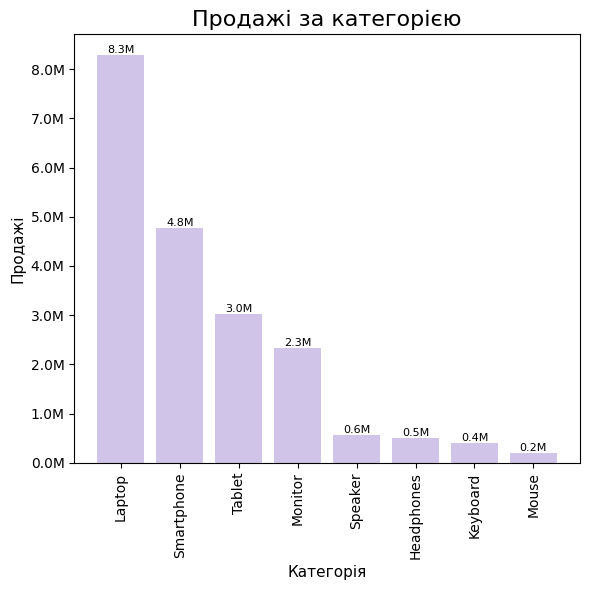

In [8]:
plt.figure(figsize=(6, 6))
bars = plt.bar(sales_by_product['Product Name'], sales_by_product['Sum sales'], color='#D1C4E9')


plt.title('Продажі за категорією', fontsize=16)
plt.xlabel('Категорія', fontsize=11)
plt.ylabel('Продажі', fontsize=11)

plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

for bar in plt.gca().patches:  
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/1e6:.1f}M', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

